## Multilayer perceptron. Stochastic gradient descent


### Класс перцептрона
Вход            -   столбец $ W_{in} \;[ 784 \times 1] $, $ 784 = 28 \times 28 $ -- размер исходного изображения  
Первый слой     -   столбец $ S_{1} \; [16 \times 1] $  
Второй слой     -   столбец $ S_{2} \; [10 \times 1] $  
Выходной слой   -   столбец $ W_{out} \; [10 \times 1] $  
В выходном слое в элементе $W_{out}[i], i \in [0,9]$ содержится оценка вероятности того, что на вход подано изображение числа $i$  
В качестве функции активации используется сигмоида $\sigma (x) = \frac{1}{1 + e^{-x}}$  

In [1]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt


class Perceptron:
    # INFO
    # Matrix sizes

    # s_in:  [w_in_dim  x 1        ]
    # w_1:   [w_1_dim   x w_in_dim ]
    # w_2:   [w_2_dim   x w_1_dim  ]
    # w_3:   [w_out_dim x w_2_dim  ]
    # s_out: [w_out_dim x 1        ]

    s_in_dim = 0  # size of input vector
    w_1_dim = 0  # number of rows in 1st hidden layer
    w_2_dim = 0  # number of rows in 2nd hidden layer
    s_out_dim = 0  # size of output vector

    layers = []  # [w_1, w_2, w_3]
    w_1 = []  # matrix with coefficients in ->  1
    w_2 = []  # matrix with coefficients 1  ->  2
    w_3 = []  # matrix with coefficients 2  ->  out

    delta_w_1 = []
    delta_w_2 = []
    delta_w_3 = []

    eta = 0
    test_num = 0  # 0 in the beginning of learning. Increases when picture is processed
    epoch_num = 0  # 0 in the beginning of learning. Increases when the whole battery of test pictures is processed

    error = []  # array of errors of all the tests

    def act_func(self, x):
        return 1 / (1 + np.exp(-x))

    def __init__(self, s_in_dim, w_1_dim, w_2_dim, s_out_dim, is_continuation):
        if is_continuation:
            self.load_changes()
        else:
            self.s_in_dim = s_in_dim
            self.w_1_dim = w_1_dim
            self.w_2_dim = w_2_dim
            self.s_out_dim = s_out_dim

            self.w_1 = np.random.sample((w_1_dim, s_in_dim)) / 10000
            self.w_2 = np.random.sample((w_2_dim, w_1_dim)) / 100
            self.w_3 = np.random.sample((s_out_dim, w_2_dim)) / 10

            self.delta_w_1 = np.zeros((w_1_dim, s_in_dim))
            self.delta_w_2 = np.zeros((w_2_dim, w_1_dim))
            self.delta_w_3 = np.zeros((s_out_dim, w_2_dim))

            self.layers = [self.w_1, self.w_2, self.w_3]

    def recognize(self, picture):
        s_1 = self.act_func(self.w_1 @ picture)
        s_2 = self.act_func(self.w_2 @ s_1)
        s_out = self.act_func(self.w_3 @ s_2)
        print(s_out)
        return np.argmax(s_out)

    def back_propagation(self, picture, ans, alpha):
        picture = np.array(picture).reshape((len(picture), 1))
        s_1 = self.act_func(self.w_1 @ picture)
        s_2 = self.act_func(self.w_2 @ s_1)
        s_out = self.act_func(self.w_3 @ s_2)

        indicators = np.zeros(self.s_out_dim)
        indicators[ans] = 1

        delta_3 = s_out * (s_out - np.ones(self.s_out_dim).reshape((self.s_out_dim, 1))) * (
                indicators.reshape((self.s_out_dim, 1)) - s_out)
        delta_2 = 100 * s_2 * (np.ones(len(s_2)).reshape((len(s_2), 1)) - s_2) * (self.w_3.T @ delta_3)
        delta_1 = 10000 * s_1 * (np.ones(len(s_1)).reshape((len(s_1), 1)) - s_1) * (self.w_2.T @ delta_2)

        self.delta_w_3 = alpha * self.delta_w_3 + \
                         ((1 - alpha) * self.eta * s_2.reshape((self.w_2_dim, 1)) @ delta_3.reshape(
                             (1, self.s_out_dim))).T
        self.delta_w_2 = alpha * self.delta_w_2 + \
                         ((1 - alpha) * self.eta * s_1.reshape((self.w_1_dim, 1)) @ delta_2.reshape(
                             (1, self.w_2_dim))).T
        self.delta_w_1 = alpha * self.delta_w_1 + \
                         ((1 - alpha) * self.eta * picture @ delta_1.reshape((1, self.w_1_dim))).T

        self.w_3 -= self.delta_w_3
        self.w_2 -= self.delta_w_2
        self.w_1 -= self.delta_w_1

        self.error.append(np.linalg.norm(indicators - s_out) / 2)

    def save_changes(self):
        pass

    def load_changes(self):
        pass

    def teach(self, epochs_num):
        mndata = MNIST('samples')
        images, labels = mndata.load_testing()

        self.load_changes()

        for epoch in range(epochs_num):
            self.eta = 2 / (self.epoch_num + 1 + self.test_num ** (1 / 10))
            for image, label in zip(images, labels):
                self.back_propagation(image, label, 0.1)
                self.test_num += 1
            self.save_changes()
            self.epoch_num += 1
            self.test_num = 0
            print('Epoch {} pocessed'.format(self.epoch_num))

        fig, ax = plt.subplots()
        x = range(len(self.error))
        y = self.error
        ax.plot(x, y, label='Значение функции ошибок')
        plt.grid()
        plt.show()

c:\program files (x86)\jetbrains\python\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


Epoch 1 pocessed
Epoch 2 pocessed
Epoch 3 pocessed
Epoch 4 pocessed
Epoch 5 pocessed
Epoch 6 pocessed
Epoch 7 pocessed
Epoch 8 pocessed
Epoch 9 pocessed
Epoch 10 pocessed


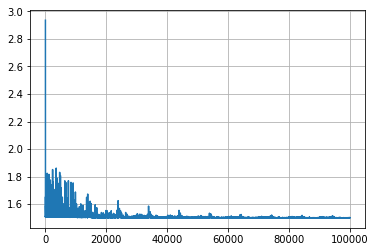

Wall time: 34.3 s


In [2]:
%%time
perchik = Perceptron(28 * 28, 16, 16, 10, False)
perchik.teach(10)

In [3]:
mndata = MNIST('samples')
images, labels = mndata.load_testing()
perchik.recognize(images[0])

[0.09992113 0.11862804 0.09558518 0.09868248 0.10025825 0.07658589
 0.10352108 0.11490993 0.09281755 0.07680261]


c:\program files (x86)\jetbrains\python\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


1